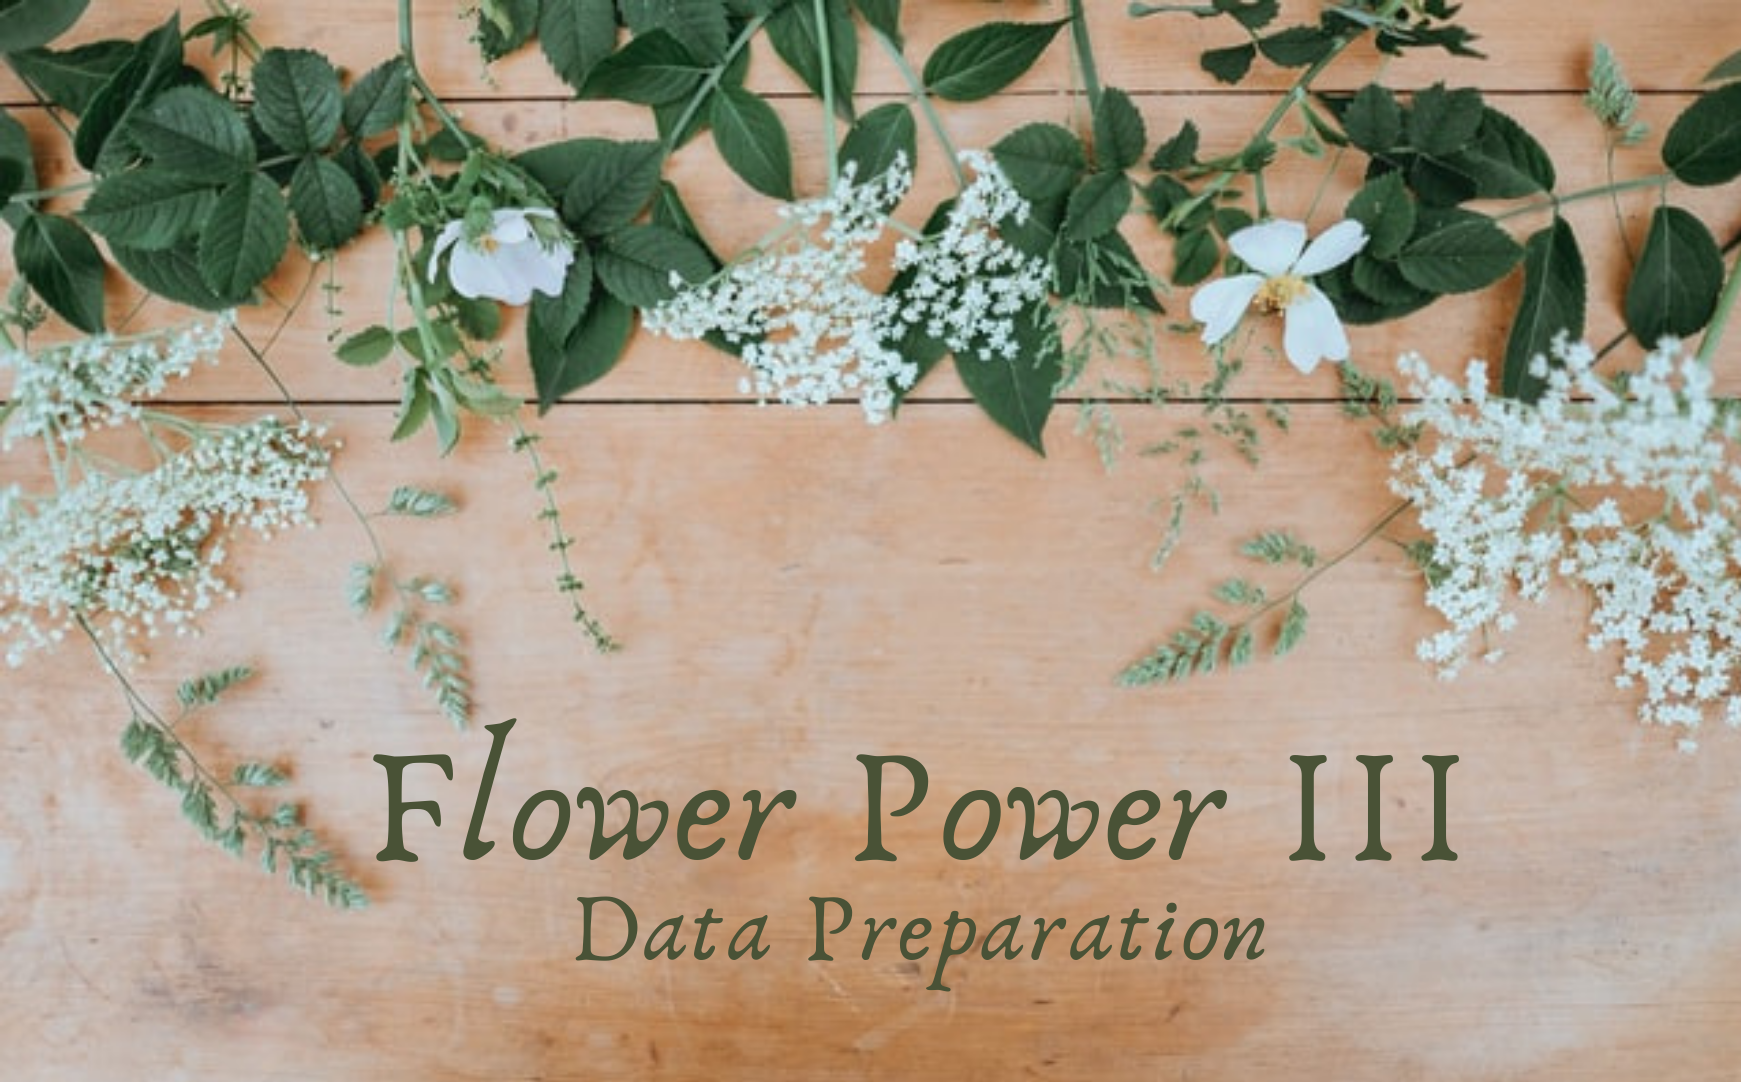

The Data Preparation phase of the IBM's CRISP model is about preparing the final dataset to be used in the later stages. In this phase, the table, record, and attribute selection, as well as transformation and cleaning are considered. Practice shows that these tasks are likely to be performed multiple times. 

### 1. Libaries and Data Imports

In [1]:
import pandas as pd
import os
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
from PIL import Image as PImage

In [2]:
data = pd.read_excel ('./Flowers-new.xlsx') 

In [3]:
path = './Eindhoven_Flower_DataSet_2021/'

### 2. Excel File Processing 

In [4]:
data.head()

date landscape              location  photo_id  english_name  \
0  2 April, 2021  Woodland  Helmond | Warandabos  _B4A2382  Wood Anemone   
1            NaN  Woodland  Helmond | Warandabos  _B4A2389  Wood Anemone   
2            NaN  Woodland  Helmond | Warandabos  _B4A2399  Wood Anemone   
3            NaN  Woodland  Helmond | Warandabos  _B4A2402  Wood Anemone   
4            NaN  Woodland  Helmond | Warandabos  _B4A2403  Wood Anemone   

            unit other_flower  
0  Single flower          NaN  
1  Single flower          NaN  
2  Single flower          NaN  
3  Single flower          NaN  
4  Single flower          NaN

#### 2.1. Unique flower names

In [5]:
data['english_name'].unique()

array(['Wood Anemone', 'Red Dead-nettle ', 'Red Dead-nettle',
       'Lesser Celandine', 'Common Dandelion', 'Lesser Celandine\xa0',
       'Daisy', 'Chickweed', 'Marsh-marigold ', 'Marsh-marigold',
       'Cuckooflower ', 'Cuckooflower', 'Butterbur', "Miner's Lettuce",
       "Miner's Lettuce ", 'Cow Parsley', 'Thale Cress', 'Common Nettle',
       'Common Water-crowfoot ', 'Green Alkanet', 'White Nettle',
       'Bittercress', 'Redstem Filaree\xa0', 'Field forgot-me-not',
       "Dove's-foot Crane's Bill", 'Creeping Buttercup', 'Marsh Valerian',
       'Ribwort Plantain', 'Bugle ', 'Marsh Thistle', 'Yellow Flag',
       'Bluebell', 'Red Clover', 'Sorrel', 'Ox-eye Daisy ',
       'Ragged-robin', 'Turnip Rape', 'Common Vetch', 'Greater Celandine',
       'Flatweed', 'Groundsel', 'White Clover', 'Marsh Lousewort',
       'Comfrey', "Shepherd's Purse", 'Field pansy', 'Lesser Trefoil',
       'Field Mouse-ear', 'Meadow Buttercup', 'Common Lousewort',
       'True Forget-me-not ', 'Hidcote

In [6]:
len(data['english_name'].unique())

129

 <p style="font-style: italic"> In the previous two steps, we noticed that some of the unique names are repeating due to the whitespaces at the end of a few cells. Furthermore, an example can be observed in the first row. Thus, we had to remove each empty space at the end of each cell. The code for this is shown in the next line.</p>

In [7]:
data['english_name']=data['english_name'].str.replace(' +$', '')

<ipython-input-7-c266056b52e1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['english_name']=data['english_name'].str.replace(' +$', '')


In [8]:
# Number of unique names after removing all whitespaces at the end. 
len(data['english_name'].unique())

122

In [9]:
data['english_name'].unique()

array(['Wood Anemone', 'Red Dead-nettle', 'Lesser Celandine',
       'Common Dandelion', 'Lesser Celandine\xa0', 'Daisy', 'Chickweed',
       'Marsh-marigold', 'Cuckooflower', 'Butterbur', "Miner's Lettuce",
       'Cow Parsley', 'Thale Cress', 'Common Nettle',
       'Common Water-crowfoot', 'Green Alkanet', 'White Nettle',
       'Bittercress', 'Redstem Filaree\xa0', 'Field forgot-me-not',
       "Dove's-foot Crane's Bill", 'Creeping Buttercup', 'Marsh Valerian',
       'Ribwort Plantain', 'Bugle', 'Marsh Thistle', 'Yellow Flag',
       'Bluebell', 'Red Clover', 'Sorrel', 'Ox-eye Daisy', 'Ragged-robin',
       'Turnip Rape', 'Common Vetch', 'Greater Celandine', 'Flatweed',
       'Groundsel', 'White Clover', 'Marsh Lousewort', 'Comfrey',
       "Shepherd's Purse", 'Field pansy', 'Lesser Trefoil',
       'Field Mouse-ear', 'Meadow Buttercup', 'Common Lousewort',
       'True Forget-me-not', 'Hidcote Pink', 'Broad-leaved Marsh Orchid',
       'Common Twayblade', 'Tormentil', 'Meadow Th

#### 2.2. Fixing typing mistakes

 <p style="font-style: italic"> From the EDA that we have made, we have plotted all types of units and we noticed that two typing mistakes were made. Therefore, we are replacing the single values with the same name as the unit with multiple values. ("spike - Spike; "Umrel - Umbrel"). </p>

In [10]:
data['unit'] = data['unit'].str.replace('spike','Spike')
data['unit'] = data['unit'].str.replace('Umrel','Umbrel')
data['unit'] = data['unit'].str.replace('Single Flower','Single flower')

#### 2.3. Splitting the location

<p style="font-style: italic"> Since the column "location" contains the city and extra information regarding where the photo was taken such as district, we have splitted the values of the column into two different columns - "location(the city)" and "district". </p>

In [11]:
data['district'] = data['location'].str.split('|').str[1]

In [12]:
data['location'] = data['location'].str.split('|').str[0]

In [13]:
data.head(10)

date landscape  location  photo_id     english_name  \
0  2 April, 2021  Woodland  Helmond   _B4A2382     Wood Anemone   
1            NaN  Woodland  Helmond   _B4A2389     Wood Anemone   
2            NaN  Woodland  Helmond   _B4A2399     Wood Anemone   
3            NaN  Woodland  Helmond   _B4A2402     Wood Anemone   
4            NaN  Woodland  Helmond   _B4A2403     Wood Anemone   
5            NaN  Woodland  Helmond   _B4A2404     Wood Anemone   
6            NaN  Woodland  Helmond   _B4A2405     Wood Anemone   
7            NaN     Urban  Helmond   _B4A2406  Red Dead-nettle   
8            NaN     Urban  Helmond   _B4A2407  Red Dead-nettle   
9            NaN     Urban  Helmond   _B4A2408  Red Dead-nettle   

            unit other_flower           district  
0  Single flower          NaN         Warandabos  
1  Single flower          NaN         Warandabos  
2  Single flower          NaN         Warandabos  
3  Single flower          NaN         Warandabos  
4  Single flower          NaN         Warandabos  
5  Single flower          NaN         Warandabos  
6  Single flower          NaN         Warandabos  
7          Spike          NaN   industrieterrein  
8          Spike          NaN   industrieterrein  
9          Spike          NaN   industrieterrein

#### 2.4. Filling missing values for date

<p style="font-style: italic"> Since the date is only filled for the first row per visit, the following code fills in the NaN values of the rows with missing data. The funcition used is ‘ffill’ which stands for ‘forward fill’ and replaces the missing values with the corresponding value in the previous row. </p>

In [14]:
data['date'] = data['date'].ffill()

In [15]:
data.head(10)

date landscape  location  photo_id     english_name  \
0  2 April, 2021  Woodland  Helmond   _B4A2382     Wood Anemone   
1  2 April, 2021  Woodland  Helmond   _B4A2389     Wood Anemone   
2  2 April, 2021  Woodland  Helmond   _B4A2399     Wood Anemone   
3  2 April, 2021  Woodland  Helmond   _B4A2402     Wood Anemone   
4  2 April, 2021  Woodland  Helmond   _B4A2403     Wood Anemone   
5  2 April, 2021  Woodland  Helmond   _B4A2404     Wood Anemone   
6  2 April, 2021  Woodland  Helmond   _B4A2405     Wood Anemone   
7  2 April, 2021     Urban  Helmond   _B4A2406  Red Dead-nettle   
8  2 April, 2021     Urban  Helmond   _B4A2407  Red Dead-nettle   
9  2 April, 2021     Urban  Helmond   _B4A2408  Red Dead-nettle   

            unit other_flower           district  
0  Single flower          NaN         Warandabos  
1  Single flower          NaN         Warandabos  
2  Single flower          NaN         Warandabos  
3  Single flower          NaN         Warandabos  
4  Single flower          NaN         Warandabos  
5  Single flower          NaN         Warandabos  
6  Single flower          NaN         Warandabos  
7          Spike          NaN   industrieterrein  
8          Spike          NaN   industrieterrein  
9          Spike          NaN   industrieterrein

#### 2.5. Creating a "month" column

In [16]:
# converting the date object format to datetime format
data['date'] = pd.to_datetime(data.date)

In [17]:
data['month'] = data['date'].dt.strftime('%B')

In [18]:
# rearranging column positions
column_names =  'date', 'month', 'landscape', 'location', 'district', 'photo_id', 'english_name', 'unit', 'other_flower'
data = data.reindex(columns = column_names)

In [19]:
data.head(10)

date  month landscape  location           district  photo_id  \
0 2021-04-02  April  Woodland  Helmond          Warandabos  _B4A2382   
1 2021-04-02  April  Woodland  Helmond          Warandabos  _B4A2389   
2 2021-04-02  April  Woodland  Helmond          Warandabos  _B4A2399   
3 2021-04-02  April  Woodland  Helmond          Warandabos  _B4A2402   
4 2021-04-02  April  Woodland  Helmond          Warandabos  _B4A2403   
5 2021-04-02  April  Woodland  Helmond          Warandabos  _B4A2404   
6 2021-04-02  April  Woodland  Helmond          Warandabos  _B4A2405   
7 2021-04-02  April     Urban  Helmond    industrieterrein  _B4A2406   
8 2021-04-02  April     Urban  Helmond    industrieterrein  _B4A2407   
9 2021-04-02  April     Urban  Helmond    industrieterrein  _B4A2408   

      english_name           unit other_flower  
0     Wood Anemone  Single flower          NaN  
1     Wood Anemone  Single flower          NaN  
2     Wood Anemone  Single flower          NaN  
3     Wood Anemone  Single flower          NaN  
4     Wood Anemone  Single flower          NaN  
5     Wood Anemone  Single flower          NaN  
6     Wood Anemone  Single flower          NaN  
7  Red Dead-nettle          Spike          NaN  
8  Red Dead-nettle          Spike          NaN  
9  Red Dead-nettle          Spike          NaN

### 3. Labeling of the images

 <p style="font-style: italic"> The code below is used to label the images according to the english name of the flower. Additionally, there is a function which concatenates the name of the flower to the name of the image. Also, the pictures which are not present in the excel file are stored in a different folder called "Extra images". Furthermore, a csv file with the duplicated images from the dataset (2 photos having the same photo_id) is created. Also, we have added screenshots of how the end result looks like. </p>

In [20]:
# taking the photo ids
def get_photo_ids(data):
    # initializing an empty array
    photo_ids = []
    
    # adding all ids to the array
    for i in range(len(data)):
        col_name = 'photo_id'
        col_index = data.columns.get_loc(col_name)
        current_id = data.iloc[i, col_index]
        # adding .JPG to the photo id so it matches with the id of the photo
        photo_ids.append(str(current_id) + '.JPG')
    
    return photo_ids

In [21]:
# taking the english name of each flower
def get_eng_names(data):
    # initializing an empty array
    names = []
    
    # adding all names to the array
    for i in range(len(data)):
        col_name = 'english_name'
        col_index = data.columns.get_loc(col_name)
        current_name = data.iloc[i, col_index]
        names.append(current_name)
    return names

In [22]:
def get_unique_names(data):
    # getting the english names
    eng_names = get_eng_names(data)

    # initialize an empty array for the unique values
    unique_names = []

    # traverse for all elements
    for x in eng_names:
        # check if exists in unique_names or not
        if x not in unique_names:
            unique_names.append(x)

    return unique_names

In [23]:
def to_one_folder(path):
    
    # loading the images 
    images = listdir(path)
    
    # looping through all three dates 
    for i in range(len(images)):
        new_path = os.path.join(path, images[i])
        new_images = listdir(new_path)
        # looping though each folder for each date
        for j in range(len(new_images)):
            current_path = os.path.join(new_path, new_images[j])
            current_images = listdir(current_path)
            # moving the images to the parent directory and deleting the previous two
            for img in current_images:
                os.rename(current_path + '/' + img, path + img)
            os.rmdir(current_path)
        os.rmdir(new_path)

In [24]:
to_one_folder(path)

In [25]:
def check_data_for_missing_photos(path, data):
    
    # checking tha data for duplicating ids (the original and the copy)
    if data['photo_id'].duplicated().sum() > 0:
        # saving the duplicated entries so they can be examinied 
        duplicates = data[data['photo_id'].duplicated(keep=False)]
        duplicates.to_csv('./duplicated_photo_ids.csv')
        # Dropping the duplicated entries
        entries_to_drop = data[data['photo_id'].duplicated(keep='first')].index
        data.drop(entries_to_drop, axis=0, inplace=True)
        print('Not all ids were unique. Only the first instances were kept. Find the duplicated ids by loading duplicated_photo_ids.csv\n')
        #raise Exception('Not all ids are unique. See the duplicated ids by loading duplicated_photo_ids.csv.')
   
    photo_ids = get_photo_ids(data)
    
    extra_images = []
    images = listdir(path)
    
    for img in images:
         if img not in photo_ids:
            extra_images.append(img)
    
    if len(extra_images) == 0:
        print('There are no extra photos\n')
    else:
        # Drop the extra images and add them in separate folder
        destination = './Extra images/'
        isDir = os.path.isdir(destination)
        if not isDir:
            os.mkdir(destination)
        for i in extra_images:
            for j in images:
                if i == j:
                    os.rename(path + i, destination + i)
            else:
                continue
        print(f'There were {len(extra_images)} extra photos that are not in the dataset. They have been moved to data/Extra images. \n')
        return extra_images

In [26]:
extra_images = check_data_for_missing_photos(path, data)

Not all ids were unique. Only the first instances were kept. Find the duplicated ids by loading duplicated_photo_ids.csv

There were 19 extra photos that are not in the dataset. They have been moved to data/Extra images. 



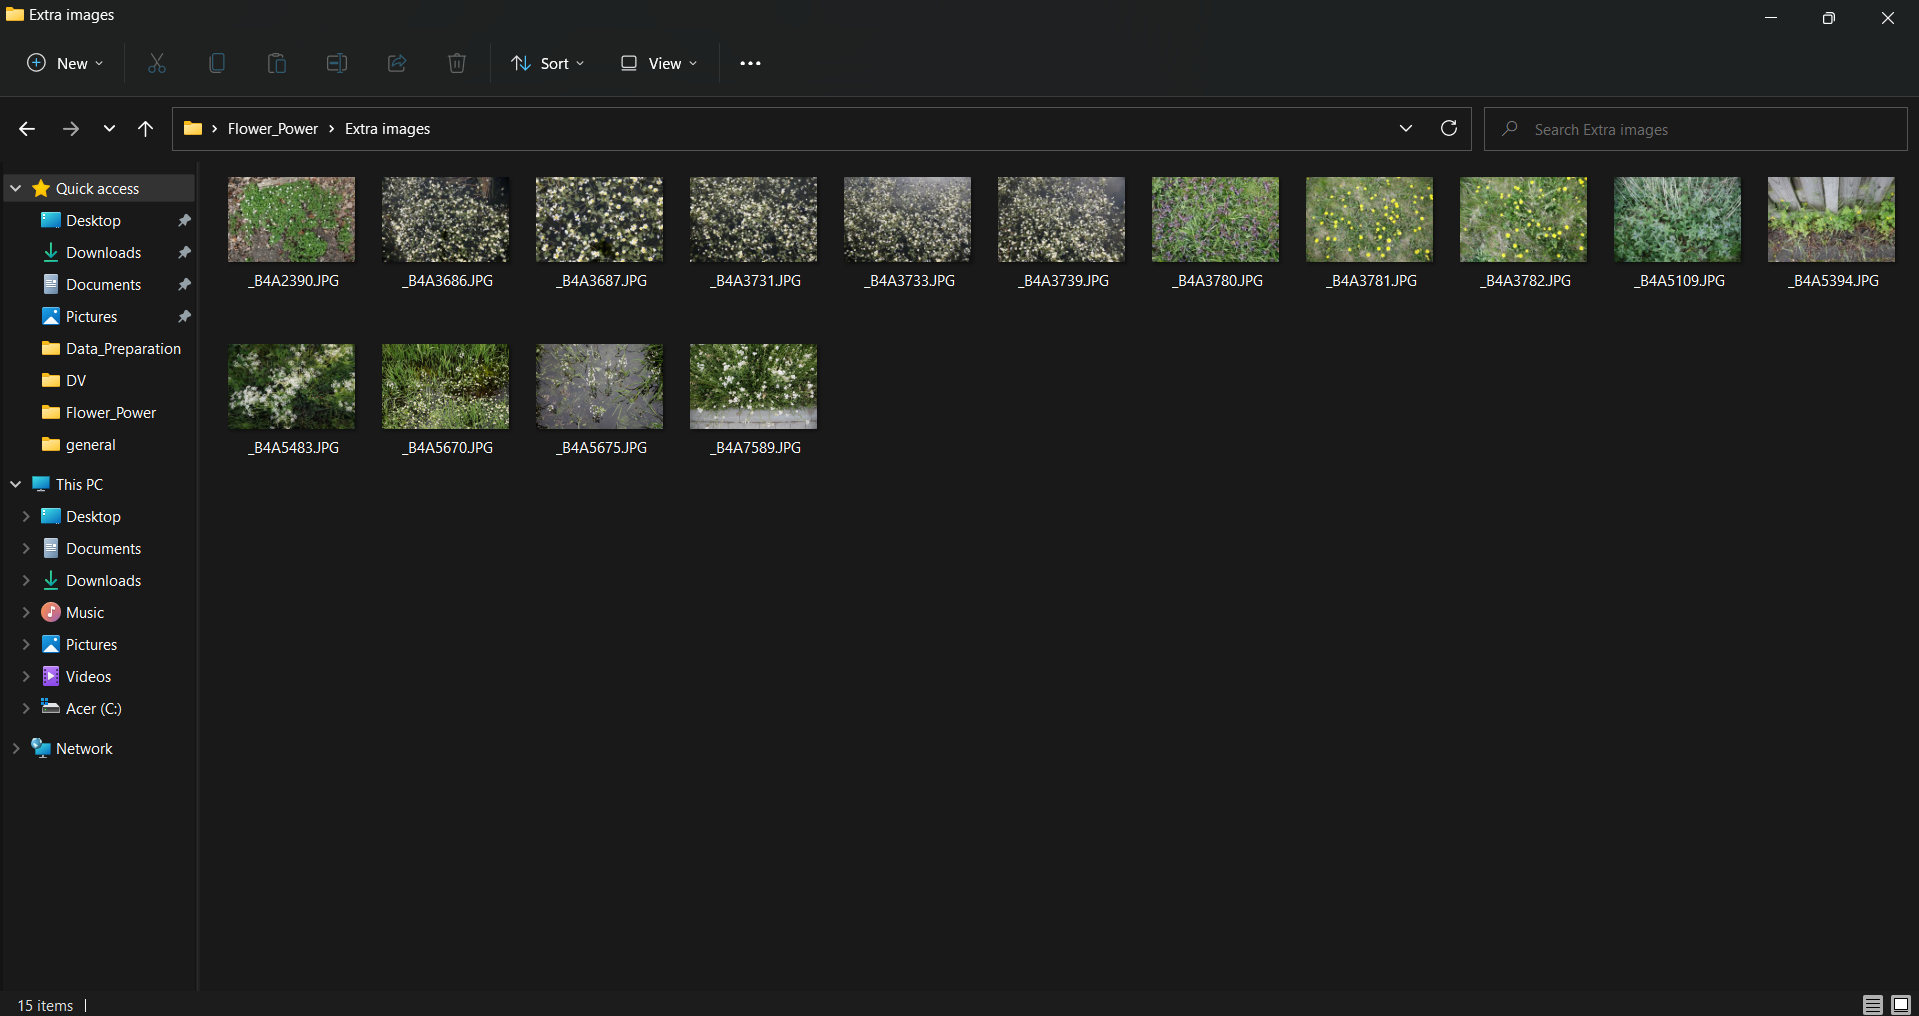

In [27]:
duplicated_photos = pd.read_csv('./duplicated_photo_ids.csv')

In [33]:
duplicated_photos

Unnamed: 0        date  month                landscape           location  \
0          77  2021-04-23  April                      NaN       Nederwetten    
1          83  2021-04-26  April                      NaN         Eindhoven    
2         496  2021-06-09   June                 Roadside  Nuenen-Eindhoven    
3         497  2021-06-09   June                 Roadside  Nuenen-Eindhoven    
4         751  2021-07-27   July  Nederwetten | Dommeldal         Pool (LT8)   
5         752  2021-07-27   July  Nederwetten | Dommeldal         Pool (LT8)   

                    district  photo_id           english_name           unit  \
0                  Dommeldal  _B4A3639           Cuckooflower         Raceme   
1                       Bokt  _B4A3639  Common Water-crowfoot  Single flower   
2   Europalaan & Sterrenlaan  _B4A7579                 Yarrow         Umbrel   
3   Europalaan & Sterrenlaan  _B4A7579                 Yarrow         Umbrel   
4                        NaN  _B4A9763             Water Mint           Head   
5                        NaN  _B4A9763              Gypsywort          Spike   

                                    other_flower  
0                                            NaN  
1                                            NaN  
2                                            NaN  
3                                    Rode Klaver  
4                   Grote Wederik (out-of-focus)  
5  Grote Waterweegbree, Watermunt (not blooming)

In [29]:
# Function that renames the images by adding their english name to the photo id
def rename_images(path, data):
    # loading the images
    images = listdir(path)
    
    # taking all photo ids
    photo_ids = get_photo_ids(data)
    
    # taking the english name of each flower
    names = get_eng_names(data)

    new_captions = []
    for i in range(len(images)):
        for j in range(len(photo_ids)):
            if images[i] == photo_ids[j]:
                caption = names[j] + images[i]
                original_path = os.path.join(path, images[i])
                new_path = os.path.join(path, caption)
                os.replace(original_path, new_path)

In [30]:
rename_images(path, data)

In [31]:
def label_images(path, data):
    
    # load the images
    images = listdir(path)
    
    # get the unique names of the flowers
    u_names= get_unique_names(data)
    
    # taking all photo ids
    photo_ids = get_photo_ids(data)
  
    # create a directory for each name and move the corresponding pictures to the new directories
    for u_n in u_names:
        for img in images:
            for ids in photo_ids:
                if u_n + ids == img:
                    destination = os.path.join(path, u_n)
                    isDir = os.path.isdir(destination)
                    if isDir:
                        # add / to the unique names to they can be used as directories
                        os.rename(path + img, destination + '/' + img)
                    else:
                        os.mkdir(destination)
                        os.rename(path + img, destination + '/' + img)  
    print('Labeling has finished.')

In [32]:
label_images(path, data)

Labeling has finished.


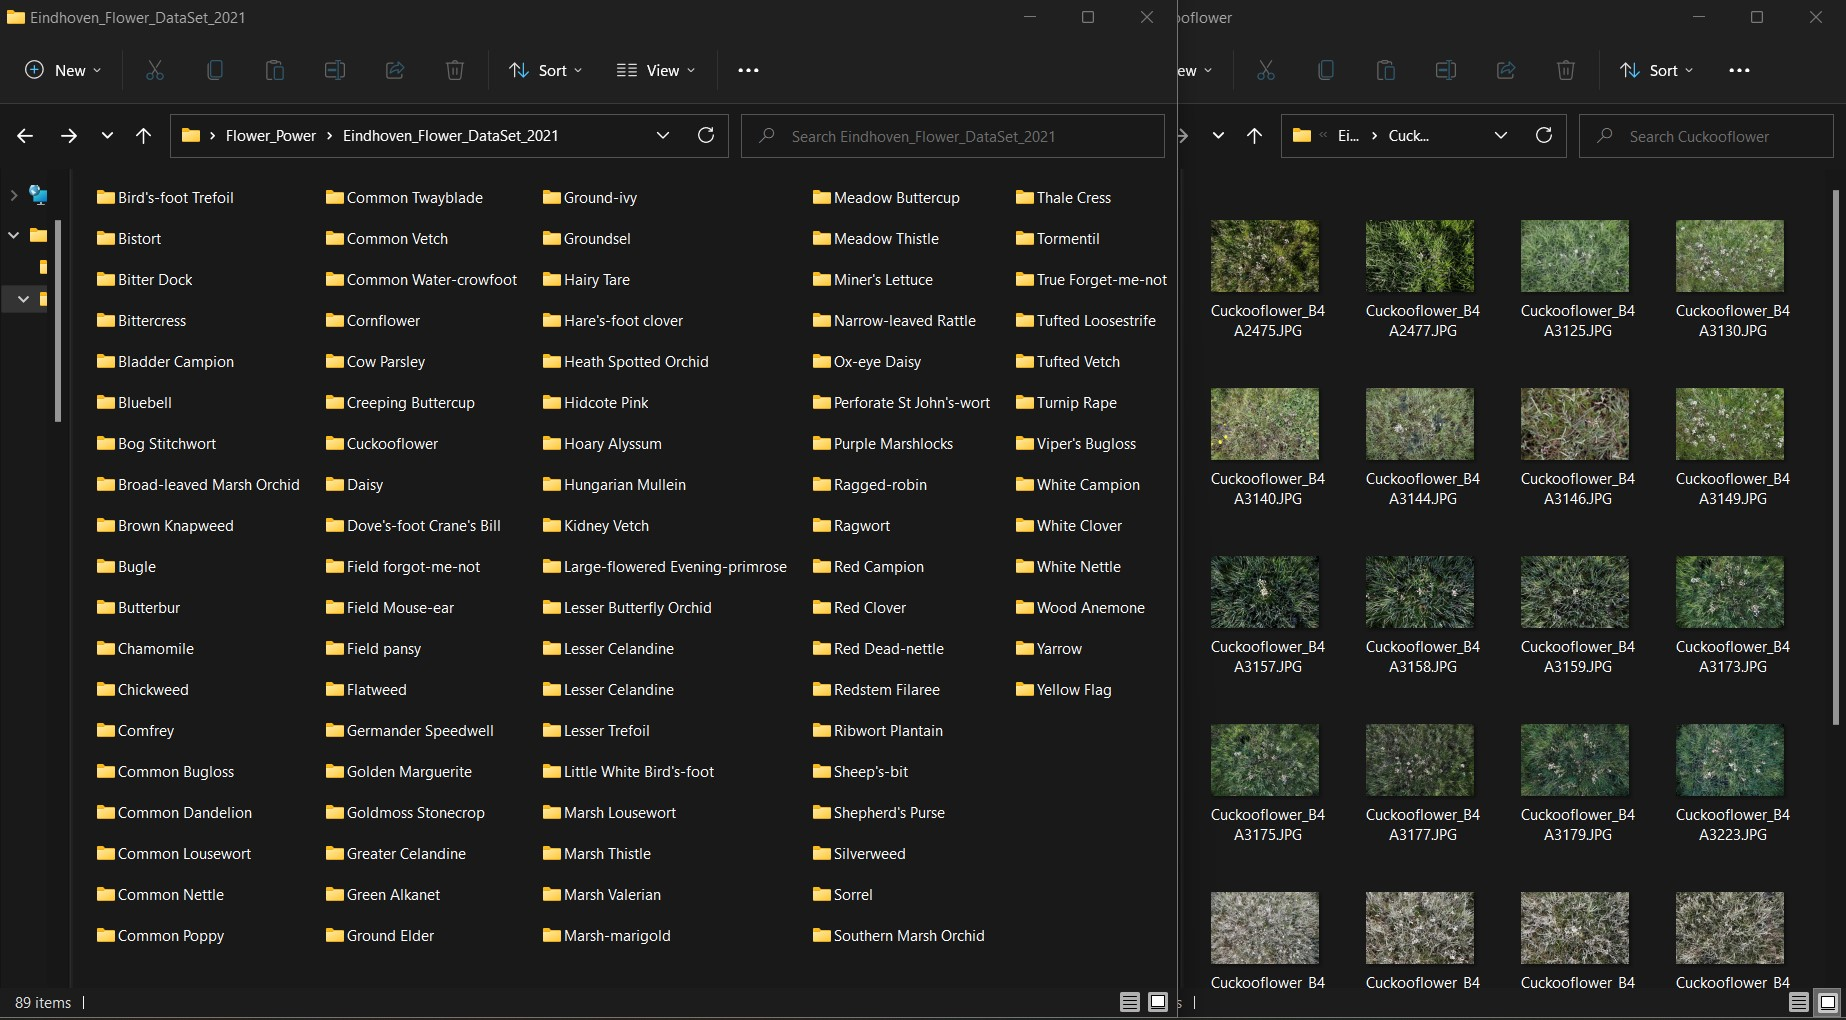

### 4. Conclusion 

<p style="font-style: italic"> Overall, the excel file needed some pre-processing due to the mulitple typos. Moreover, the client had whitespaces in some of the column names as well as in some of the rows. Also, the excel file was not that well structured - around the table, there were different headings and paragraphs which are irrelevant for our AI model. Furthermore, the way in which the images were stored was a bit confusing and impractical for people who are not familiar with this field.</p>
    
<p style="font-style: italic"> After the Data Preparation phase was completed, we have a structured environment with folders of flowers per flower name and a standardized excel file. </p>